In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def circle_coordinates(a, b, r, num_points=1000):
    coordinates = []
    for i in range(num_points):
        theta = 2 * np.pi * i / num_points
        x = a + r * np.cos(theta)
        y = b + r * np.sin(theta)
        coordinates.append((x, y))
    return coordinates

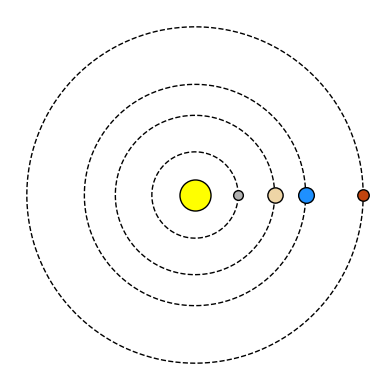

In [55]:
planet_sizes = {'mercury': 2440, 'venus': 6052, 'earth': 6371, 'mars': 3390}
planet_colors = {'mercury': '#B0B0B0', 'venus': '#EED5A6', 'earth': '#1E90FF', 'mars': '#C1440E'}
planet_orbital_rads = {'mercury': 0.39, 'venus': 0.72, 'earth': 1.00, 'mars': 1.52}
planet_orbital_periods = {'mercury': 88, 'venus': 225, 'earth': 365.25, 'mars': 687}

plt.figure(figsize=(4, 4))
plt.scatter(0, 0, 500, color='yellow', edgecolors='k', lw=1)

for name in planet_sizes.keys():
    size = planet_sizes[name]
    color = planet_colors[name] 
    orbital_radius = planet_orbital_rads[name]
    orbital_period = planet_orbital_periods[name]
    orbital_coords = circle_coordinates(0, 0, orbital_radius)
    x, y = zip(*orbital_coords)
    
    plt.plot(x, y, color='k', linestyle='--', lw=1)
    plt.scatter(orbital_radius, 0, size/50, color, edgecolors='k', lw=1, zorder=10)

plt.axis('off')
plt.tight_layout()
plt.savefig('solar-preview.png', dpi=200)

In [ ]:
planet_sizes = {'mercury': 2440, 'venus': 6052, 'earth': 6371, 'mars': 3390}
planet_colors = {'mercury': '#B0B0B0', 'venus': '#EED5A6', 'earth': '#1E90FF', 'mars': '#C1440E'}
planet_orbital_rads = {'mercury': 0.39, 'venus': 0.72, 'earth': 1.00, 'mars': 1.52}
planet_orbital_periods = {'mercury': 88, 'venus': 225, 'earth': 365.25, 'mars': 687}
planet_trajectories = {'mercury': [], 'venus': [], 'earth': [], 'mars': []}

for name in planet_sizes.keys():
    size = planet_sizes[name]
    color = planet_colors[name] 
    orbital_radius = planet_orbital_rads[name]
    orbital_period = planet_orbital_periods[name]
    angular_speed = 2 * np.pi / orbital_period

    # 4 years in days
    for day in range(1461):
        theta = angular_speed * day
        x = orbital_radius * np.cos(theta)
        y = orbital_radius * np.sin(theta)
        planet_trajectories[name].append((x, y))

def update(i):
    ax.clear()
    ax.axis('off')
    ax.set_xlim(-2.3, 2.3)
    ax.set_ylim(-2.3, 2.3)
    ax.scatter(0, 0, s=250, color='yellow', edgecolors='k', lw=1)

    for name in planet_sizes.keys():
        x, y = planet_trajectories[name][i]
        size = planet_sizes[name]
        color = planet_colors[name]
        orbital_radius = planet_orbital_rads[name]
        ax.scatter(x, y, size/100, color, edgecolors='k', lw=1, zorder=10)

        trail_length = 65  # Maximum trail length
        start_index = max(0, i - trail_length)
        x, y = zip(*planet_trajectories[name])
        ax.plot(x[start_index:i], y[start_index:i], color='k', linestyle='--', lw=1)

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
anim = FuncAnimation(fig, update, frames=1000, interval=30)
anim.save('solar-system-centered-sun.gif', savefig_kwargs={"transparent": True})

In [ ]:
planet_sizes = {'mercury': 2440, 'venus': 6052, 'earth': 6371, 'mars': 3390}
planet_colors = {'mercury': '#B0B0B0', 'venus': '#EED5A6', 'earth': '#1E90FF', 'mars': '#C1440E'}
planet_orbital_rads = {'mercury': 0.39*2, 'venus': 0.72*2, 'earth': 1.00*2, 'mars': 1.52*2}
planet_orbital_periods = {'mercury': 88, 'venus': 225, 'earth': 365.25, 'mars': 687}
planet_trajectories = {'mercury': [], 'venus': [], 'earth': [], 'mars': []}

earth_orbital_radius = planet_orbital_rads['earth']
earth_angular_speed = 2 * np.pi / planet_orbital_periods['earth']
earth_trajectory = [(earth_orbital_radius * np.cos(earth_angular_speed * day),
                     earth_orbital_radius * np.sin(earth_angular_speed * day))
                    for day in range(1461)]

sun_trajectory = [(-x, -y) for x, y in earth_trajectory]

for name in planet_sizes.keys():
    if name == 'earth':
        continue

    orbital_radius = planet_orbital_rads[name]
    orbital_period = planet_orbital_periods[name]
    angular_speed = 2 * np.pi / orbital_period

    for day in range(1461):
        theta = angular_speed * day
        # Relative position to Earth
        x = orbital_radius * np.cos(theta) - earth_trajectory[day][0]
        y = orbital_radius * np.sin(theta) - earth_trajectory[day][1]
        planet_trajectories[name].append((x, y))

def update(i):
    ax.clear()
    ax.axis('off')
    ax.set_xlim(-6, 4)
    ax.set_ylim(-5.3, 4.7)

    # Draw the Sun relative to Earth
    sun_x, sun_y = sun_trajectory[i]
    ax.scatter(sun_x, sun_y, s=250, color='yellow', edgecolors='k', lw=1, zorder=5)

    # Draw Earth at the center
    ax.scatter(0, 0, s=planet_sizes['earth'] / 100, color=planet_colors['earth'], edgecolors='k', lw=1)

    # Draw the planets and their growing trajectory trail
    for name in planet_sizes.keys():
        if name == 'earth':
            continue
        
        # Calculate the start index for the trajectory trail
        trail_length = 100  # Maximum trail length
        start_index = max(0, i - trail_length)
        x, y = zip(*planet_trajectories[name])
        ax.plot(x[start_index:i], y[start_index:i], color='k', linestyle='--', lw=1)
        
        # Draw the planet at its current position
        x_pos, y_pos = planet_trajectories[name][i]
        size = planet_sizes[name]
        color = planet_colors[name]
        ax.scatter(x_pos, y_pos, size/100, color, edgecolors='k', lw=1, zorder=10)

    x, y = zip(*sun_trajectory)
    ax.plot(x[start_index:i], y[start_index:i], color='k', linestyle='--', lw=1)

fig, ax = plt.subplots(figsize=(4, 4), dpi=200, facecolor='white')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
anim = FuncAnimation(fig, update, frames=1000, interval=30)
anim.save('solar-system-centered-earth.gif', savefig_kwargs={'transparent': True, 'facecolor': 'none'})